# Livrable projet data rédigé

----

# Etape 3 : Modélisation du problème : Graphe complet

## <span style="color: #5884D3"> I - Définition du problème formel  </span>

Le problème consiste à <span style="color: #829ED1">**calculer sur un réseau routier une tournée permettant de relier entre elles un sous-ensemble de villes**, </span> puis de revenir à son point de départ, de manière à minimiser la durée totale de la tournée. Les routes pouvant être plus ou moins embouteillées et pouvant être plus ou moins longues.

Soit **V le nombre de villes**. La variable <span style="color: #D18282">**𝑥𝑖𝑗 à comme valeur 1 si nous choisissons d’emprunter cette route (i,j)** au cours de la tournée et **0 si ce n’est pas le cas**</span>.

Ce problème est modélisable sous la forme d’un graphe pour lequel chaque sommet représentera une
ville et chaque arrête une route. <span style="color: #829ED1">**Le poids des arrêtes correspondra à la densité de la circulation et à la longueur de la rue**<span>.

Imaginons donc le graphe **G=(V,R)**, avec **V l’ensemble des villes** et **R l’ensemble de routes**.

## <span style="color: #5884D3"> II - Variables de décision </span>
<br>

- $𝑥_{𝑖𝑗}$ : 𝑏𝑜𝑜𝑙é𝑒𝑛 𝑣𝑟𝑎𝑖 𝑠𝑖 𝑜𝑛 𝑝𝑎𝑠𝑠𝑒 𝑝𝑎𝑟 𝑙𝑎 𝑟𝑜𝑢𝑡𝑒 (𝑖,𝑗)
- C : nombre de véhicules disponible pour la tournée (c représente un véhicule)
- L : ensemble des villes dans lesquelles une livraison est nécessaire


## <span style="color: #5884D3"> III - Fonction objectif </span>
<br>

Le but étant de minimiser le coût de la tournée de livraison, nous avons la fonction objectif suivante :
<br><br>

$$Min \sum_{c\in C} \sum_{(i,j)\in \Re } x^{c}_{ij}c_{ij}$$

## <span style="color: #5884D3"> IV - Contraintes </span>
<br>

$$ (1) \sum_{c\in C} \sum_{{i\in L}{\wedge}{i \ne j}} x^{c}_{ij} = 1 $$

$$ (2) \sum_{c\in C} \sum_{{j\in L}{\wedge}{j \ne i}} x^{c}_{ji} = 1 \rightarrow j \ne i$$

$$ (3) \sum_{i\in V\{0\}} x^{c}_{0j} = 1$$

$$ (4) \sum_{{i\in V}{\wedge}{i \ne j}} x^{c}_{0j} - \sum_{i\in V} x^{c}_{0j} = 0 $$

$$ (5) x_{ij} = \{0,1\}$$

$$ (6) \sum_{c\in C\{0\}} - \sum_{(i,j) \in \Re} x^{c}_{ij} \le |L| - 1 $$

$$ (7) \sum_{{i\in V}{\wedge}{i\notin L}{\wedge}{i \ne j}} x^{c}_{ij} = 0 $$

$$ Avec : \forall (i,j) \in \cup, \forall i \in V, \forall j \in V, \forall c \in C $$

<br><br>
**Tableau d'explication des contraintes :**
<br><br>

|Contrainte|Explication|
|-|:-:|
|(1)|On n’autorise une seule entrée à chaque point de livraison|
|(2)|On n’autorise une seule sortie à chaque point de livraison|
|(3)|Tous nos camions de livraison doivent partir du dépôt|
|(4)|Le nombre de camions entrants du dépôt doit être le même que le nombre de camions sortants|
|(5)|1 : on emprunte la route (i,j) et 0 : on ne l’emprunte pas|
|(6)|On empêche UN camion de livrer tout un sous ensemble|
|(7)|On interdit le passage vers toute ville n’appartenant pas à l’ensemble |

## <span style="color: #5884D3"> V - L’étude de complexité de ce problème  </span>
<br>

Notre problème s'apparente à une variante du **problème du voyageur de commerce : le VRP** car c'est un problème d'optimisation qui determine un <span style="color: #829ED1">**plus court chemin en visistant chaque ville d'une liste donnée, tout en retournant a son point de départ**<span>.

la variante du voyageur de commerce nommée <span style="color: #829ED1">**VRP est un problème d'optimisation combinatoire qui permet de trouver un ensemble optimal d'itinéraires qu'une flotte de véhicules doit traverser pour livrer à un ensemble donné de clients**</span>.

Etant donné que l'on recherche également à <span style="color: #D18282">**trouver un cycle Hamiltonien**</span> dans notre sous-ensemble de villes à livrer, **étudier la complexité du problème du voyageur de commerce revient à étudier celle du VRP et celle de notre problème**.
<br>

### <span style="color: #D3A658"> Méthode exacte : </span>
<br>

**Le recherche exhaustive** est une première approche du problème qualifiable de **naîve**. Elle est très simple mais au prix d’une complexité en temps très élevée : <span style="color: #829ED1">**elle consiste à déterminer toutes les solutions, à en évaluer la valeur, puis à sélectionner la meilleure de ces solutions**</span>. Dans notre contexte, cela se traduit par la <span style="color: #D18282">**recherche de tous les cycles hamiltoniens**</span>.

Or, dans un **graphe complet Kn**, il y a **(n−1)! chemins possibles**. Etant donné que nous sommes dans un **graphe non-orienté**, nous **pouvons parcourir chacune des arrêtes dans le sens que nous le voulons**, c'est pourquoi nous pouvons dire qu'il y a <span style="color: #829ED1">**(n−1)! /2 chemins possibles**</span>.

Or pour <span style="color: #829ED1">**calculer le poids d'un chemin il faut additionner le poids de toutes ses arrêtes, au nombre de (n-1)**</span>.

<span style="color: #D18282">**La complexité de notre problème est donc factorielle de O((n-1)*(n−1)! /2)**</span>
<br><br>
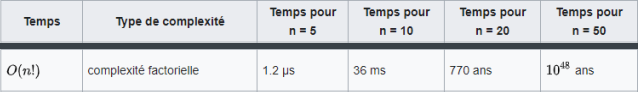
<br><br>
Avec une **approche naîve**, notre <span style="color: #D18282">**problème n'est pas résolvable en temps polynomial**</span>. Notre problème **n'appartient donc pas à la classe P**. Or nous savons qu'<span style="color: #829ED1">**il est possible de vérifier une solution efficacement très rapidement (temps polynomial) et que tous les problèmes NP peuvent se ramener à celui-ci via réduction polynomiale**</span>. Nous pouvons donc affirmer que <span style="color: #D18282">**notre problème est NP-Complet**</span>.


<span style="color: #D18282">**Notre problème est donc impossible à résoudre avec une approche naïve**</span>. Cependant une **méthode approchée pourrait trouver une solution optimale en temps polynomial**. C'est pourquoi nous allons les étudier ci-dessous.

# Etape 5 : Implémentation et étude statistique du comportement expérimental

## <span style="color: #5884D3"> I - Analyse du Dataset </span>

Pour l'analyse de nos donnée, nous nous sommes **basés sur une étude <span style="color: #829ED1">des</span> arete à une heure donnée ou <span style="color: #829ED1">d'une</span> arete à une heure donnée**. (Comme sur les exemples ci-dessous)

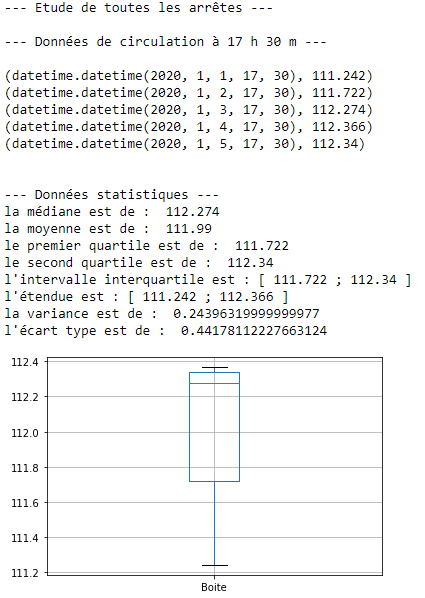

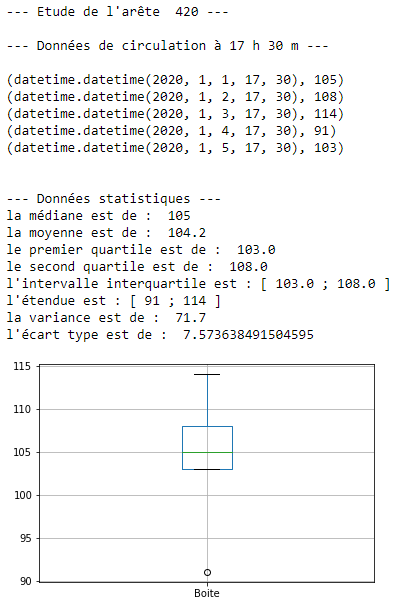

Ceci nous donne **plusieurs informations**, notamment la **variance** qui nous **<span style="color: #829ED1">montre que les données sont plus ou moins étalées, en fonction du point de vue</span>**.

## <span style="color: #5884D3"> II - Regression linéaire </span>

Afin de pouvoir **prédire le trafic à moment donné pour une arete**, nous avons choisi d'**<span style="color: #D18282">implémenter un modèle de régression linéaire</span>**. Chaque arete dispose donc de 2 regression linéaire (1 le matin et 1 le soir)

**Ce modèle est entrainé par les données présentes dans la bdd**, et nous permet donc de **prédire un nombre de vehicules**.
Ayant peu de donnée nous avons préféré **<span style="color: #D18282">regrouper les données de la semaine par heure pour ettofer les features de notre modèles</span>**, plutôt que de faire une régression linéaire par jour.

***Remarque : Notre régression aurait put être plus performante si plus de données nous étaient proposées***.

Voici un exemple des regressions linéaires pour une arete :

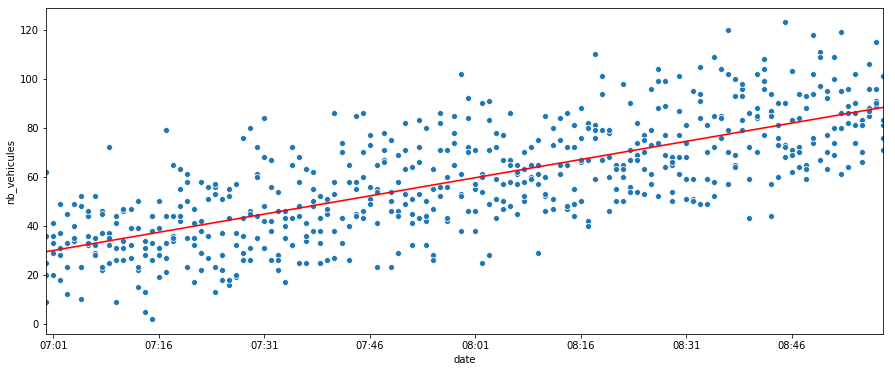

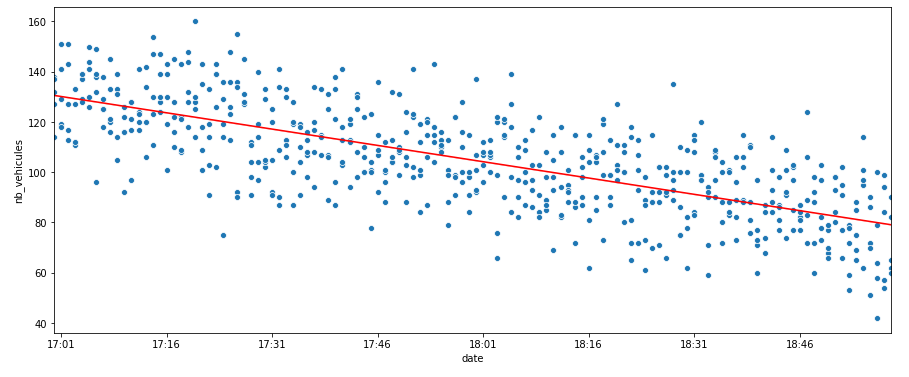

On constate qu'elles **passent bien au centre des nuages de point**, mais **<span style="color: #D18282">au vu de la dispersion des données, elle obtiendra un score de prédiction faible</span>**. La encore ce score aurait pu être amélioré avec une étude portant sur une plus grande population.

**<span style="color: #D18282">Les données que ces dernières prédiront à un instant T, seront utilisées pour notre graphe</span>**.

## <span style="color: #5884D3"> III - Statistique de la régression linéaire.</span>

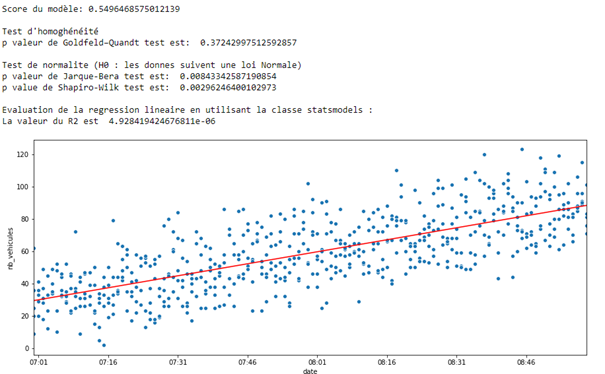

**Le « score du modèle »** est calculé grâce à librairie sklearn. La valeur est un **pourcentage et se situe entre 0 et 1**. **<span style="color: #829ED1">Plus le pourcentage est élevé plus les prédictions ont été précises</span>**. Ici le score varie selon les arrêtes mais la fourchette observée se situe entre **0.50 et 0.80**.

Ces faibles scores sont explicables par le fait que notre modèle analyse **très peu de données** (seulement 4 heures d’analyse pendant 5 jours). **De plus les conditions de circulation peuvent varier en fonction du jour de la semaine** (par exemple plus de circulation le lundi et le vendredi). 

Cependant nous n’avons pas décidé de nous baser sur les données d’une journée uniquement mais **sur les 5 jours**. Si nous nous étions basés sur les données d’une journée en particulier, le fait de prédire la circulation de l’arrête 4 un Lundi à 7h04 par exemple ne serait pas pertinent car une seule donnée dans notre bdd correspond à cette situation. On ne pourrait donc même plus parler de prédiction.

### <span style="color: #D3A658"> Les tests :</span>
    
**Le test d’homogénéité des résidus** nous indique si nos **<span style="color: #829ED1">valeurs estimées dont sont plus ou moins dispersées</span>** comparé à nos valeurs d’origine. Son résultat dépend donc grandement de la **variance**. **<span style="color: #829ED1">Plus la valeur est proche de 0 moins la dispersion (et la variance) est grande</span>**. Ici on **<span style="color: #D18282">obtient 0.37</span>** ce qui est tout de même non négligeable.

**Les tests de normalité** permettent de **<span style="color: #829ED1">vérifier si des données réelles suivent une loi normale ou non</span>**. Si elles suivent une loi normale, **<span style="color: #829ED1">la valeur s’approche de 1</span>**. La valeur du **R² est le coefficient de détermination**. **<span style="color: #829ED1">Il représente la proportion de la variation (de la prédiction) qui est expliquée par le modèle de régression</span>**. Ici également, une valeur se **rapprochant de 1 indique un modèle très précis**.
 
**<span style="color: #D18282">Nous constatons des valeurs très petites dans le cadre de notre modèle</span>**. En effet les mesures du trafic routier les différents jours sont très différentes les unes des autres (comme le montre le graphique ci-dessus).

Pour avoir de **bons résultats aux tests de normalité** et une bonne valeur de R2 (0.8-0.9), **il faudrait avoir un ensemble de points ressemblant à ceux ci-dessous**. Or nos données de circulation sont bien plus dispersées.


# Etape 4 : Modélisation de l'algorithme : Graphe Complet
## <span style="color: #5884D3"> I - Definition de l'algorithme  </span>

### <span style="color: #D3A658"> L'algorithme Génétique : </span>
<br>

Le but de notre méta heuristique est d'**obtenir une solution approché pour notre problème d'optimisation**.

Pour cela nous avons décidé de nous orienter vers un **<span style="color: #D18282">algorithme génétique</span>**, il utilise la notion de sélection naturelle et l'applique à une population de solutions qui sont potentiellement bonnes pour notre problème.


### <span style="color: #D3A658"> Les étapes : </span>
- **Construire une population** initiale de N solutions.
- **Évaluer chacun des individus** de la population en fonction de leur poid prédit par la régression linéaire.
- **Générer de nouvelles solutions** en sélectionnant les parents de façon proportionnelle à leur évaluation. 
- **Appliquer les opérateurs de croisement et de mutation** lors de la reproduction.
- Lorsque N nouveaux individus ont été générés, ils remplacent alors l’ancienne population. **Les individus de la nouvelle population sont évalués à leur tour**.
- **Si le nombre d'itérations n’est pas dépassé** (ou le nombre de générations maximal n’est pas atteint), **retourner à l’étape**

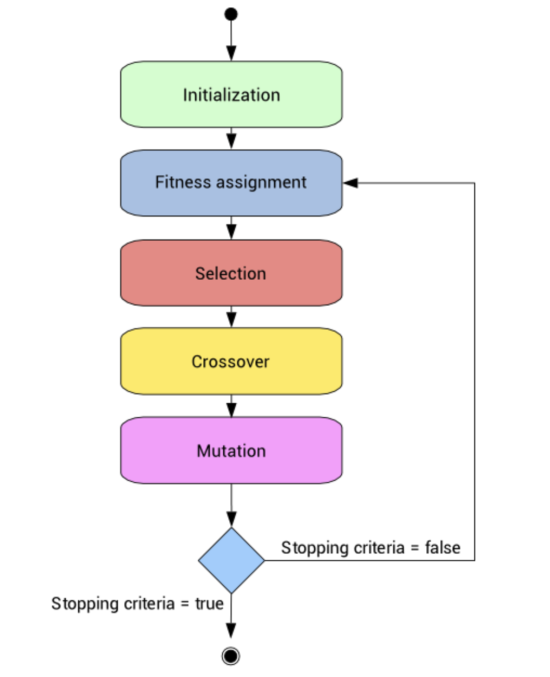

### <span style="color: #D3A658"> Les paramètres </span>

**L'algorithme génétique dépend donc de plusieurs paramètres**, qui vont le rendre plus ou moins efficace:

- La liste des clients a livrer
- Le point de départ du livreur
- Le nombre de population qui correspond au nombre de chemin proposé par iteration
- Le nombre d'itérations
- Le nombre de livreurs qui se partagerons les points à livrer

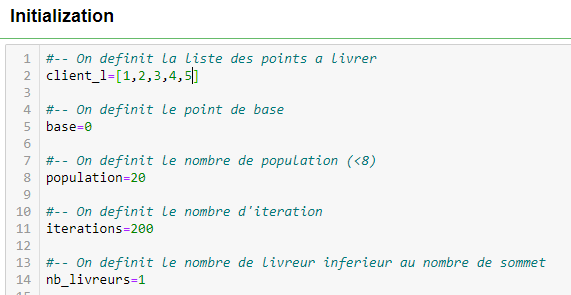

## <span style="color: #5884D3">II - Particularité des fusions et mutations </span>

Afin de **trouver un meilleur chemin**, l'algorithme génétique **<span style="color: #D18282">fusionne, mute, transforme des chemins</span>**.

**La fusion des trajets s'effectue uniquement sur les 4 meilleurs**. On va alors **<span style="color: #D18282">garder une partie de chaque chemin et compléter avec les autres en espérant obtenir un meilleur score</span>**.



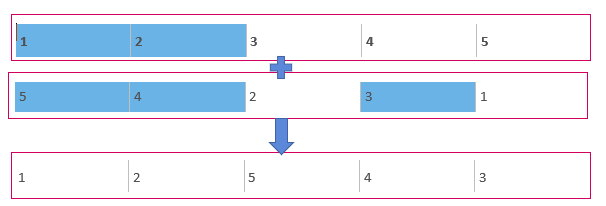

**La mutation, elle, n'est dédiée qu'aux moins bons trajets**. On va alors effectuer un **<span style="color: #D18282">décalage sur le trajet</span>**, en esperant obtenir un meilleur score.

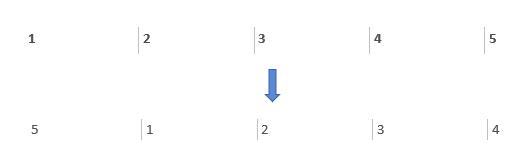

## <span style="color: #5884D3"> III - Résoudre le problème avec l'algorithme génétique</span>

Notre algorithme nous **retourne une solution a notre problème du plus court chemin**. On doit alors entrer les paramètres enonçés plus haut.
L'algorithme **trouvera donc un plus court chemin ne passant uniquement par les clients devant être livrés** en prenant soin d'apter le circuit en fonction aussi du nombre de livreurs.

Logiquement **plus on souhaite livrer de client plus le nombre d'iterations et de population nécessaires pour trouver une solution optimal est important**.

### <span style="color: #D3A658"> Avec un petit Dataset </span>

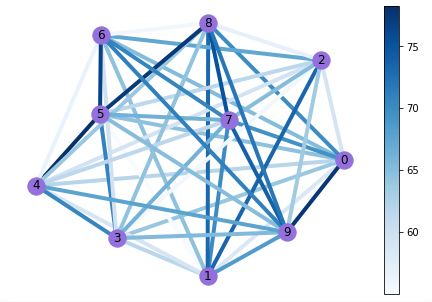

Dans un tel graphe si on souhaite livrer les points 1,2,3,4,5,6. La solution proposée sera (avec des paramètres correct) :

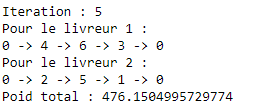

Le trajet pourrait ressembler à cela :

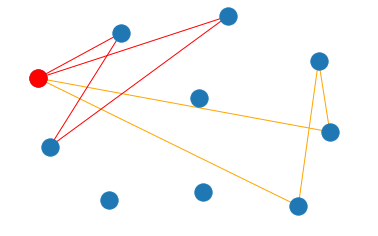

### <span style="color: #D3A658"> Grand Dataset </span>

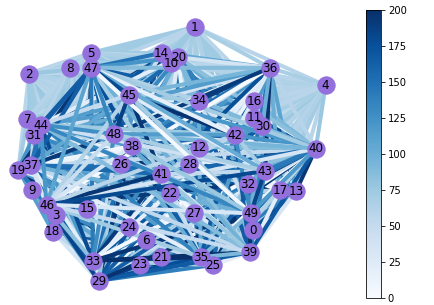

Lorsque qu'on dispose d'un **jeu de donnée trop important, il est difficile de se representer le graph**. Mais cela **<span style="color: #D18282">n'empêche pas l'algorithme de fonctionner</span>**.

Voici la solution proposer, si on souhaite passer par plus de points cette fois :

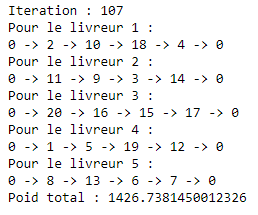

**La mutation, elle, n'est dédiée qu'aux moins bons trajets**. On va alors effectuer un décalage sur le trajet, en esperant obtenir un meilleur score.

Voici une représentation du trajet (la aussi difficilement visible) :

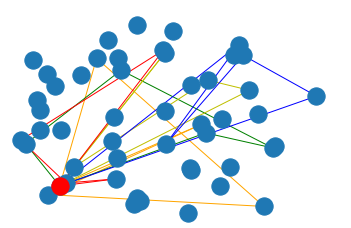

## <span style="color: #5884D3"> IV - Tableau de performances

Paramètres de l'algorithme génétique :
    - Nombre des meilleurs chromosomes selectionnés = 8
    - Nombre de générations = 200
    - Taille des Populations = 20 chromosomes

Exemple de convergence de l'algorithme génétique :

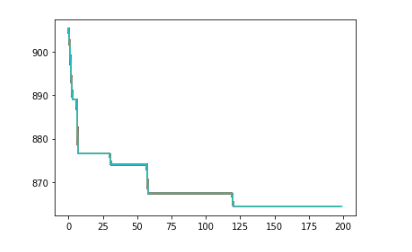

Algorithme par défaut du solveur linéaire : CBC (**Branch and cut**)

| Paramètres | Temps d'exécution (en secondes) | Retour de la Fonction Objective |
|:----------:|:-------------------------------:|:-------------------------------:|
|  GE_N45_K2 |        1.2868638038635254       |        2758.9361307565123       |
|  LP_N45_K2 |        7.216504335403442        |        909.7996469698846        |
|  GE_N45_K4 |        1.3980493545532227       |        2936.6620721351355       |
|  LP_N45_K4 |                NP               |                NP               |
|  GE_N10_K4 |        0.8008396625518799       |         864.399742808193        |
|  LP_N10_K4 |        120.50052404403687       |         825.422086216099        |

# Conclusion

Les résultats que nous exposons ici auraient pû être plus performants notamment pour la prédiction du trafic si le jeu de données d'entrée était plus conséquent.

Quelques tests supplémentaires s'appuyant sur les paramètres propres à l'algorithme génétique tels que la taille des populations ou le nombre de générations exposeraient au mieux les limites de cet algorithme.

Les solutions proposées répondent bien au Problème de tournées de véhicules. En effet, les trajets sont générés tout en évitant au maximum les routes les plus congestionnées. Les algorithmes prennent bien en compte la montée en charge sur l'augmentation de livreurs, puisque tous les clients sont livrés une seule fois par un seul livreur.

### Liens

**Ressource 1 :**
 - Auteur : S. Le Digabel, Ecole Polytechnique de Montreal
 - Date : 2018
 - Disponible : https://www.gerad.ca/Sebastien.Le.Digabel/MTH6311/8_applications_2.pdf

**Ressource 2 :**
 - Auteur : Alain Faye
 - Disponible : http://web4.ensiie.fr/~faye/RORT/minacmb/Modele_voyageur_commerce.pdf
 
**Ressource 3 :**
 - Date : 4 octobre 2019 
 - https://fr.wikipedia.org/wiki/Probl%C3%A8me_du_voyageur_de_commerce
 
**Ressource 4 :** 
 - Date : 13 décembre 2019
 - https://fr.wikipedia.org/wiki/Analyse_de_la_complexit%C3%A9_des_algorithmes
 
**Ressource 5 :**
 - Auteur : Elsevier B.V. 
 - Date : 24 April 2014
 - https://www.sciencedirect.com/science/article/pii/S0304397514001728